# An Analysis of Olympic Medal Earnings

In [1]:
library ('tidyverse')
olympics <- readr::read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-07-27/olympics.csv')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


── Column specification ────────────────────────────────────────────────────────
cols(
  id = col_double(),
  name = col_character(),
  sex = col_character(),
  age = col_double(),
  height = col_double(),
  weight = col_double(),
  team = col_character(),
  noc = col_character(),
  games = col_character(),
  year = col_double(),
  season = col_character(),
  city = col_character(),
  sport = col_character(),
  event = col_character(),
  medal = col_character()
)




In [2]:
df_medals = olympics %>%
    mutate(noc = recode(noc,URS="RUS")) %>%
    filter(medal != "NA") %>%
    mutate(noc_sorted = noc %>% fct_infreq() %>% fct_rev()) %>%
    mutate(noc_sort= fct_lump_n(noc, 20)) %>%
    mutate(medal_reorder = medal %>% fct_relevel('Bronze', after = Inf)) %>%
    group_by(noc) %>%
    mutate(medal_count = n()) %>%  
    filter(noc_sort != "Other")


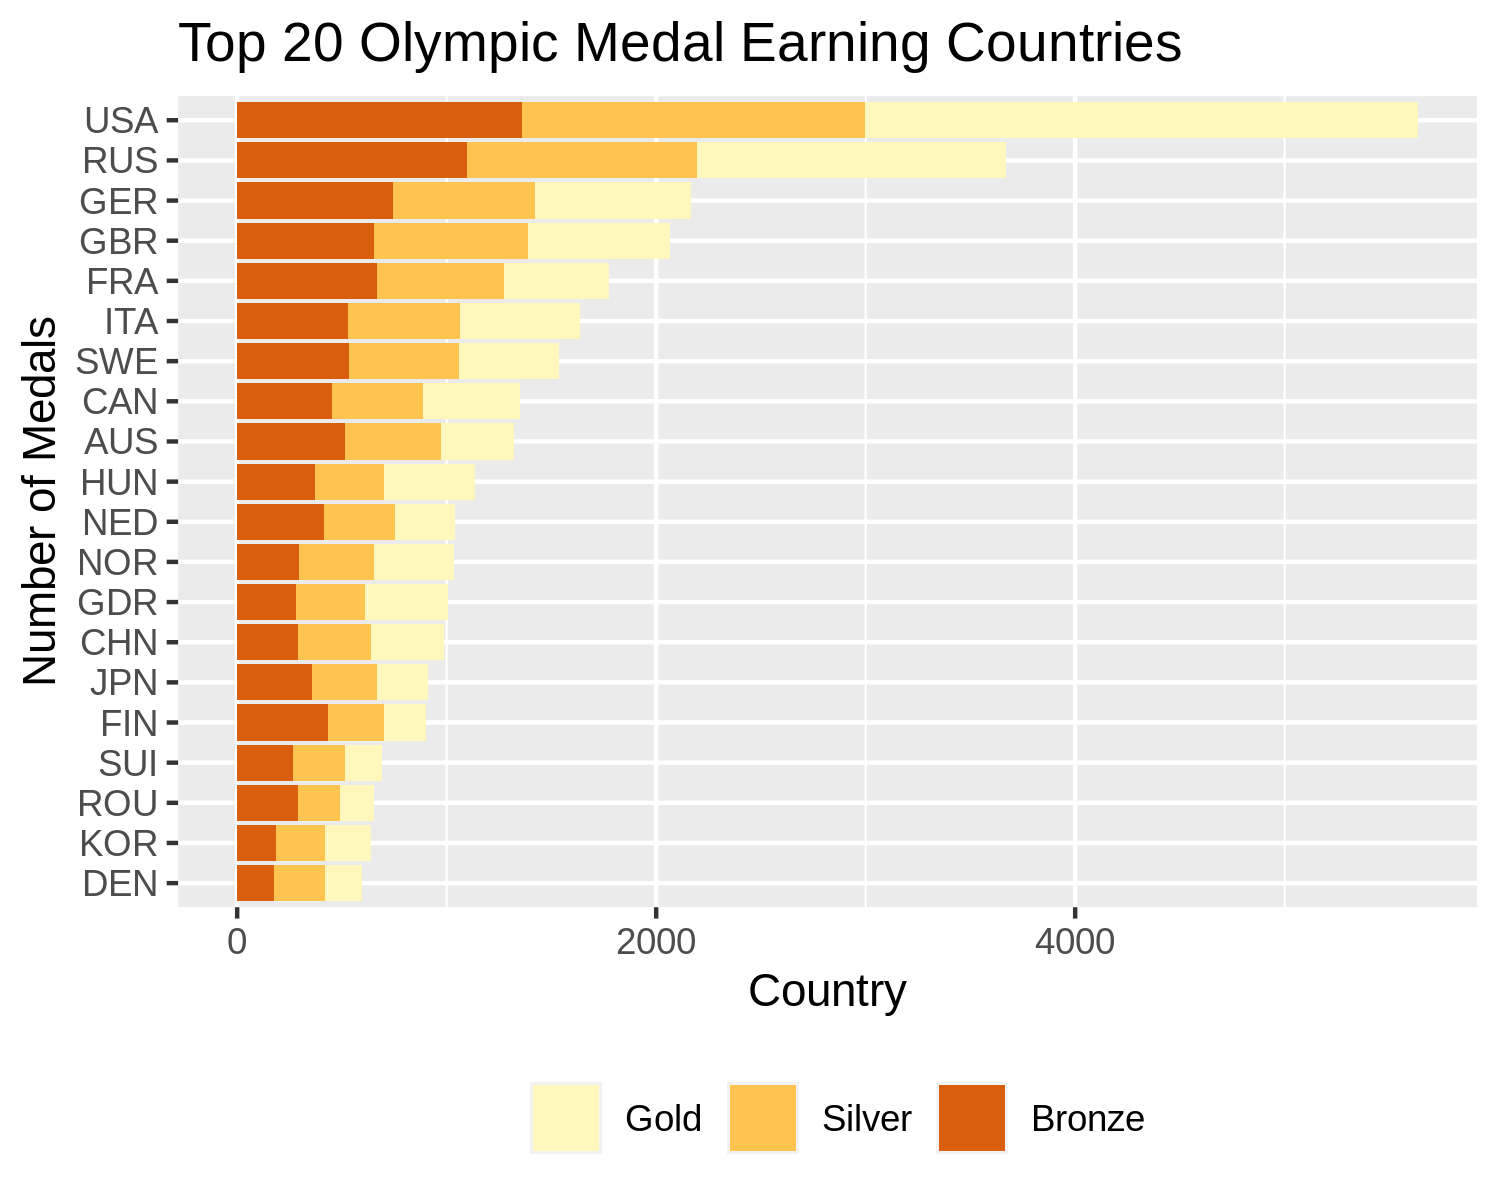

In [3]:
p = ggplot(df_medals, aes(x = noc_sorted, fill=medal_reorder))

p = p + geom_bar() + coord_flip() +
    scale_fill_brewer(palette = "YlOrBr") +
    labs(title="Top 20 Olympic Medal Earning Countries", ,y="Country", x="Number of Medals") +
    theme(legend.position="bottom", legend.title=element_blank())

p

### Figure 1. Top 20 Olympic Medal Earning Countries

&nbsp;
&nbsp;
&nbsp;

In [4]:
olympics %>% 
    filter(season=="Winter") %>%
    count(event)

olympics %>% 
    filter(season=="Summer") %>%
    count(event)

event,n
<chr>,<int>
Alpine Skiing Men's Combined,569
Alpine Skiing Men's Downhill,1164
Alpine Skiing Men's Giant Slalom,1535
Alpine Skiing Men's Slalom,1593
Alpine Skiing Men's Super G,570
Alpine Skiing Women's Combined,361
Alpine Skiing Women's Downhill,708
Alpine Skiing Women's Giant Slalom,961
Alpine Skiing Women's Slalom,966


event,n
<chr>,<int>
Aeronautics Mixed Aeronautics,1
Alpinism Mixed Alpinism,4
"Archery Men's Au Chapelet, 33 metres",3
"Archery Men's Au Chapelet, 50 metres",4
"Archery Men's Au Cordon Dore, 33 metres",3
"Archery Men's Au Cordon Dore, 50 metres",8
Archery Men's Championnat Du Monde,2
Archery Men's Continental Style,25
Archery Men's Double American Round,22


In [5]:
df_medals_season = df_medals %>%
    mutate(noc_sort_2 = factor(noc_sort, levels = c("DEN", "KOR", "ROU", "SUI", "FIN", "JPN", "CHN", "GDR", "NOR", "NED", "HUN", "AUS", "CAN", "SWE", "ITA", "FRA", "GBR", "GER", "RUS", "USA")))

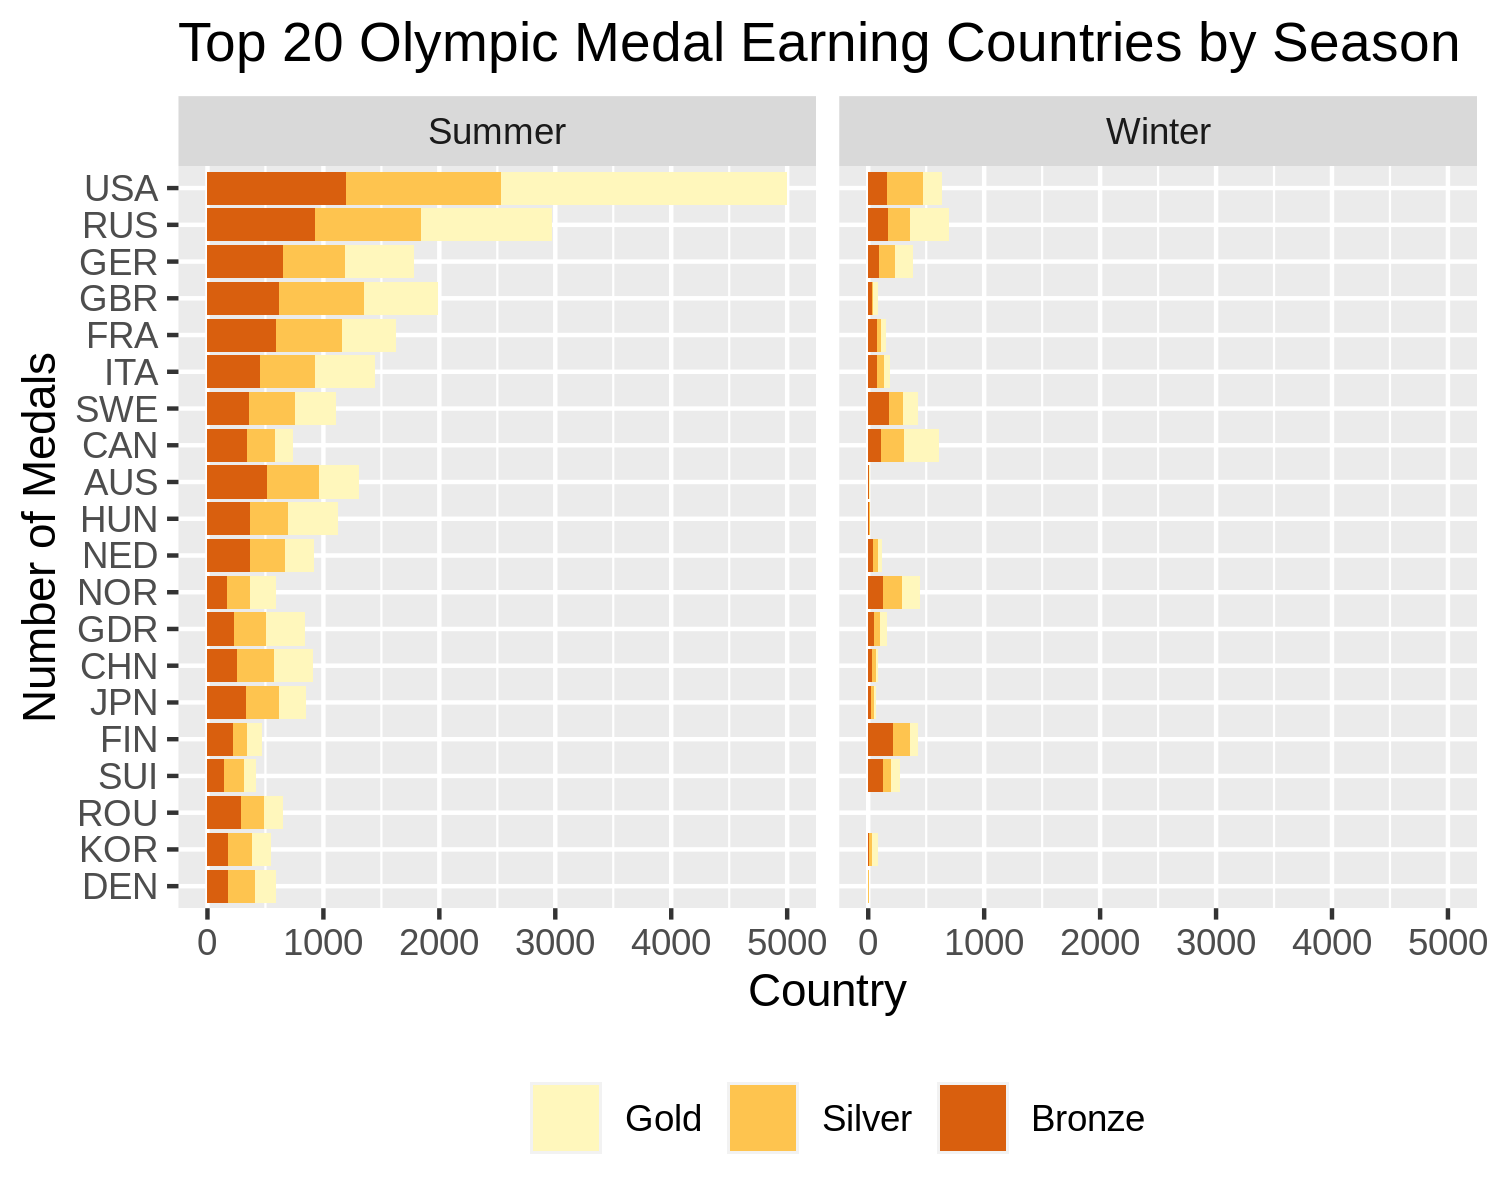

In [6]:
p = ggplot(df_medals_season, aes(x = noc_sort_2, fill=medal_reorder))

p = p + geom_bar() + coord_flip() + facet_wrap(~season) +
    scale_fill_brewer(palette = "YlOrBr") +
    labs(title="Top 20 Olympic Medal Earning Countries by Season", ,y="Country", x="Number of Medals") +
    theme(legend.position="bottom", legend.title=element_blank())

p

### Figure 2. Top 20 Olympic Medal Earning Countries by Season

In [7]:
df_medals_year = df_medals %>%
    group_by(year,noc) %>%
    mutate(medal_count_year = n()) %>%
    ungroup() %>%
    mutate(noc_sort_year= fct_lump_n(noc, 3)) %>%  
    filter(noc_sort_year != "Other")

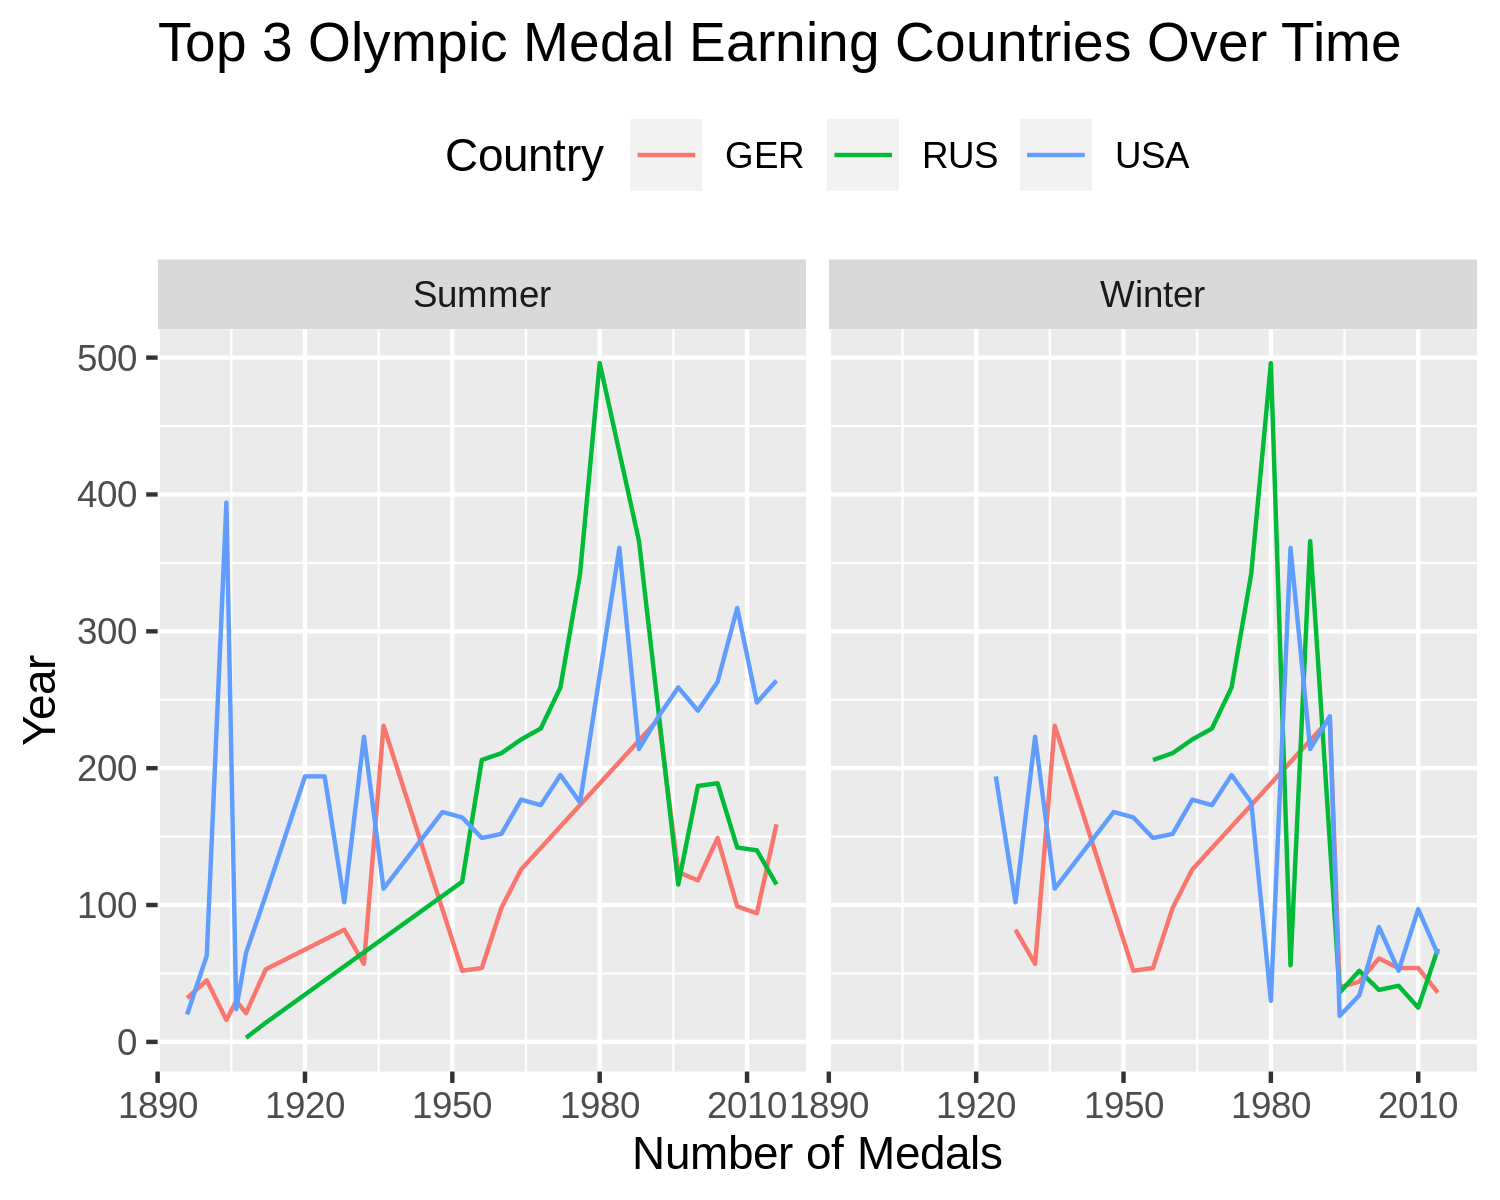

In [8]:
p = ggplot(df_medals_year, aes(x=year, y=medal_count_year, color=noc))

p = p + geom_line() +
    facet_wrap(~season) +
    labs(title="Top 3 Olympic Medal Earning Countries Over Time", ,y="Year", x="Number of Medals") +
    theme(legend.position="top") +
    labs(color="Country")

p

### Figure 3. Top 3 Olympic Medal Earning Countries Over Time

In [14]:
df_medals_rate = olympics %>%
    mutate(noc = recode(noc,URS="RUS")) %>%
    group_by(year, noc) %>%
    mutate(appearances_year=n()) %>%
    ungroup() %>%
    filter(medal != "NA") %>%
    mutate(noc_sorted = noc %>% fct_infreq() %>% fct_rev()) %>%
    mutate(noc_sort= fct_lump_n(noc, 20)) %>%
    mutate(medal_reorder = medal %>% fct_relevel('Bronze', after = Inf)) %>%
    group_by(year, noc) %>%
    mutate(medal_count_year = n()) %>%  
    mutate(rate_year = medal_count_year/appearances_year) %>%
    filter(noc=="USA" | noc=="RUS" | noc=="GER") 

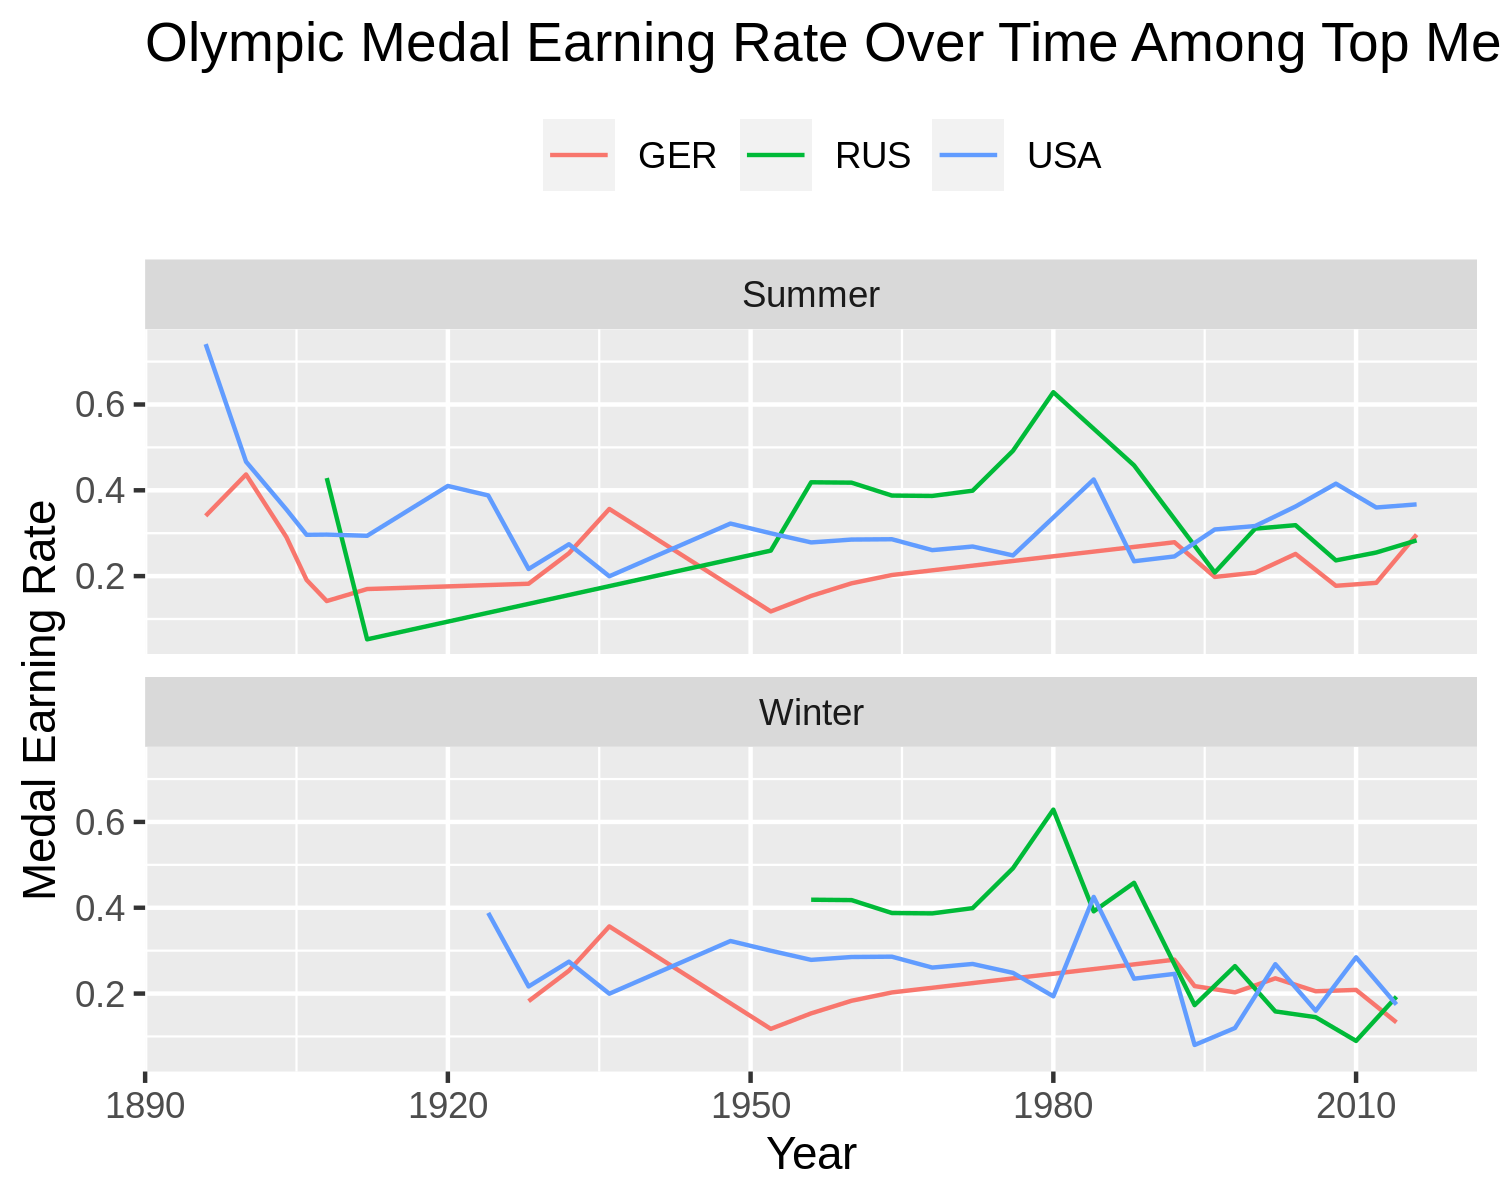

In [15]:
p = ggplot(df_medals_rate, aes(x=year, y=rate_year, color=noc))

p = p + geom_line() +
    facet_wrap(~season, nrow=2) +
    labs(title="Olympic Medal Earning Rate Over Time Among Top Medal Earners", ,y="Medal Earning Rate", x="Year") +
    theme(legend.position="top",legend.title=element_blank()) 

p

### Figure 4. Olympic Medal Earning Rate Over Time Among Top Medal Earners

&nbsp;
&nbsp;
&nbsp;

In [16]:
df_medals_rate_usa = olympics %>%
    mutate(noc = recode(noc,URS="RUS")) %>%
    group_by(year, noc) %>%
    mutate(appearances_year=n()) %>%
    ungroup() %>%
    filter(medal != "NA") %>%
    mutate(noc_sorted = noc %>% fct_infreq() %>% fct_rev()) %>%
    mutate(noc_sort= fct_lump_n(noc, 20)) %>%
    mutate(medal_reorder = medal %>% fct_relevel('Bronze', after = Inf)) %>%
    group_by(year, noc) %>%
    mutate(medal_count_year = n()) %>%  
    mutate(rate_year = medal_count_year/appearances_year) %>%
    filter(noc=="USA") 

`geom_smooth()` using formula 'y ~ x'



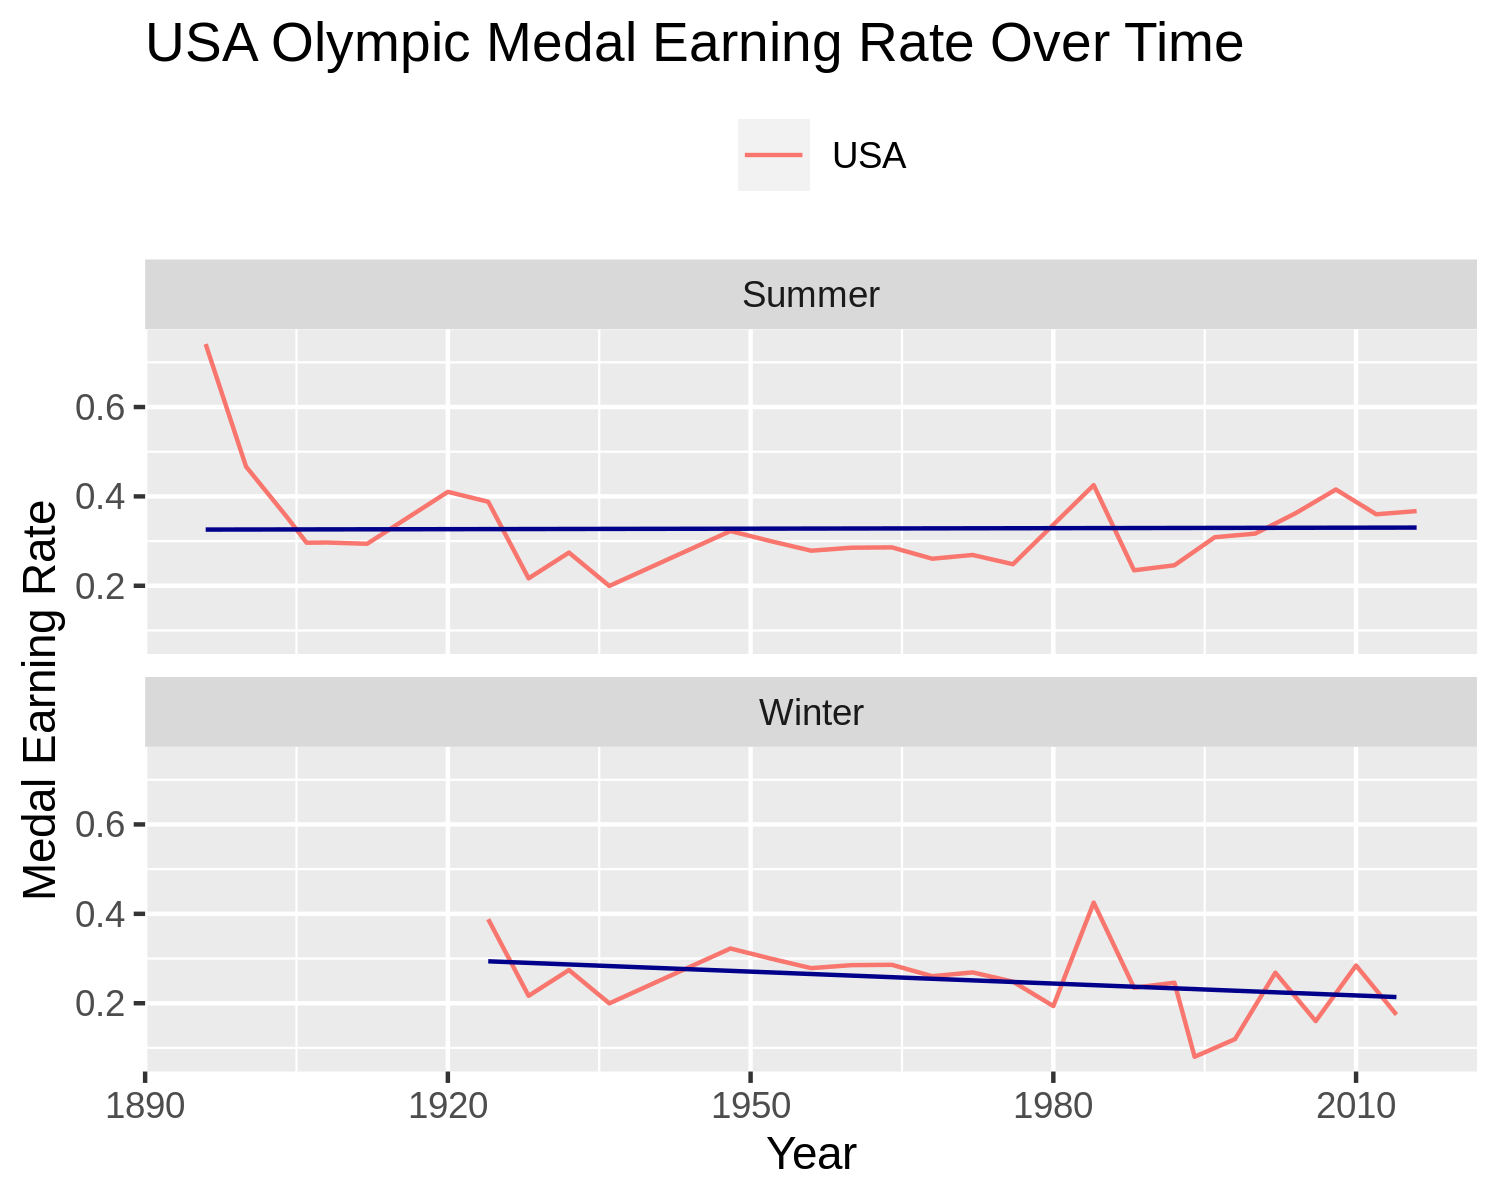

In [17]:
p = ggplot(df_medals_rate_usa, aes(x=year, y=rate_year, color=noc))

p = p + geom_line() + geom_smooth(color="darkblue",method="lm", se=FALSE, size=0.5) +
    facet_wrap(~season, nrow=2) +
    labs(title="USA Olympic Medal Earning Rate Over Time", ,y="Medal Earning Rate", x="Year") +
    theme(legend.position="top",legend.title=element_blank()) 

p

### Figure 5. USA Olympic Medal Earning Rate Over Time

## Analysis of Olympic Achievements

The Olympics Games are a major international event hosted by the International Olympic Committee (IOC); they are comprised of multi-sport events that take place every 4 years. Summer and Winter sports are separate events occuring on alternating 4-year schedules (so there is an Olympic Games every 2 years). While the Games are an amateur event, they hold significant cultural sway and thus political significance. For this reason, countries may point to Olympic success as an indicator of their global prestige and power. An analysis of total medals won seen in Figure 1. "Top 20 Olympic Medal Earning Countries" reflects this: the top 5 medal earners (the United States of America, Russia/the Soviet Union, Germany, Great Britain, and France) have all been major global political players since the the incipience of the Modern Olympic Games in 1896. However, if we stratify the data by the season of the games (Winter or Summer) as seen in Figure 2. "Top 20 Olympic Medal Earning Countries by Season" we see that countries have differentiated success when it comes to the season. Overall, there are drastically fewer medals being earned in the Winter games due to both the difference in the number of events (651 Summer events as compared to only 119 Winter events) and to the fact that the Winter games began 28 years later in 1924, as can be seen on Figure 3. "Figure 3. Top 3 Olympic Medal Earning Countries Over Time." Countries remain in the order of their overall medal count, and it is clear some countries count is bolstered by success in the Summer games (such as Great Britain and France, who have top 5 most medal despite nearly no Winter Olympic Medals) while others have great success in the Winter games (such as Canada and Sweden). However, the top 3 medal holders have success in both the Summer and Winter games. 

An analysis of the success of the top 3 medal holders (the United States, Russia/USSR, and Germany) over time shows all 3 nations seeing an overall positive trend in medals earned until 1980, when all 3 were plunged into more variable winning. All 3 have seen much lower success in the Winter Games since the mid-90s, and only the United States has maintained an upward trend in Summer Olympic medal wins since 1980. Russia's peak in 1980 could be accounted for by the boycott of the 1980 Summer Games in Moscow, led by the United States; fewer competitors means more medals. In a similar vein, I also looked at the rate at which teams won medals, calculated as the # of medals won divided by the total # of competitors that year, as seen in Figure 4. "Olympic Medal Earning Rate Over Time Among Top Medal Earners". These show a much more stable trend than the raw number of medals earned, which can vary greatly. It also shows the United States to have a slightly more positive trend in recent years than its top 2 competitors. A closer look at the United States' rate with a trend line shows that the US rate of win has remained quite consistent in both the Summer and Winter Games. 